In [1]:
import math, random, time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import k_means

In [2]:
dataset = pd.read_csv("Task_1_Data.csv")

In [3]:
x = dataset.columns[0]
y = dataset.columns[1]

In [4]:
# Centroid 1
centroids = {x: 3, y: 2}
dataset = dataset.append(centroids, ignore_index = True)

# Centroid 2
centroids = {x: 4, y: 8}
dataset = dataset.append(centroids, ignore_index = True)

In [5]:
dataset

,2016_Season_Wins,2017_Season_Wins
0,3,5
1,3,4
2,2,8
3,2,3
4,6,2
5,6,4
6,7,3
7,7,4
8,8,5
9,7,6


### Visualize Raw Data

In [6]:
centroid1 = (3, 2)
centroid2 = (4, 8)

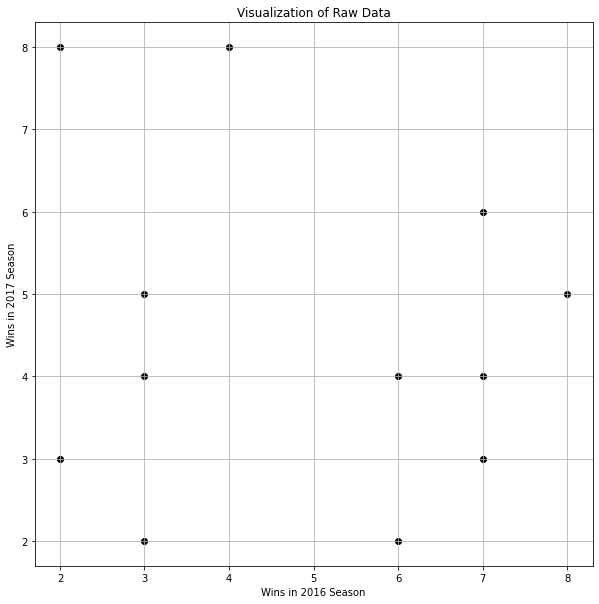

In [7]:
plt.figure(figsize=(10, 10))
plt.scatter(dataset.iloc[:, 0], dataset.iloc[:, 1], marker = 'o', color = 'black')
plt.grid()
plt.xlabel('Wins in 2016 Season')
plt.ylabel('Wins in 2017 Season')
plt.title('Visualization of Raw Data')

plt.savefig('Raw_Data.PNG')
plt.show()

In [8]:
dataset = dataset.drop([10, 11])

### Calculate Distance from Initial Centroids

* **Distance Metrics:** 


    - Manhattan Distance Formula
\begin{equation} 
d = |x_1 - x_2| + |y_1 - y_2| 
\end{equation}


    - Euclidean Distance Formula
\begin{equation} 
d = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2} 
\end{equation}

In [9]:
def Manhattan_Dist(point1, point2):
    result = abs(point1[0] - point2[0]) + abs(point1[1] - point2[1])
    return result

In [10]:
def Euclidean_Dist(point1, point2):
    result = ((point1[0] - point2[0])**2) + ((point1[1] - point2[1])**2)
    return math.sqrt(result)

In [11]:
records = dataset.to_records(index = False)
points = list(records)
points

[(3, 5),
 (3, 4),
 (2, 8),
 (2, 3),
 (6, 2),
 (6, 4),
 (7, 3),
 (7, 4),
 (8, 5),
 (7, 6)]

In [12]:
red = []
blue = []

for i in points:
    dist1 = Manhattan_Dist(centroid1, i)
    dist2 = Manhattan_Dist(centroid2, i)
    
    if min(dist1, dist2) == dist1:
        red.append(i)
    else:
        blue.append(i)

### Evaluate Red Cluster

In [13]:
# Print Elements
for i in red:
    print(i)

(3, 5)
(3, 4)
(2, 3)
(6, 2)
(6, 4)
(7, 3)
(7, 4)


In [14]:
# Compute Red Centroid after Iteration 1
print(tuple(np.average([list(points) for points in red], axis = 0)))

(4.857142857142857, 3.5714285714285716)


### Evaluate Blue Cluster

In [15]:
# Print Elements
for i in blue:
    print(i)

(2, 8)
(8, 5)
(7, 6)


In [16]:
# Compute Blue Centroid after Iteration 1
print(tuple(np.average([list(points) for points in blue], axis = 0)))

(5.666666666666667, 6.333333333333333)


### K-Means Algorithm Implementation

In [17]:
km = k_means(dataset, n_clusters = 2, return_n_iter = True)

In [18]:
centroid = km[0]
print('Red Final Centroid:', tuple(centroid[0]), end = '\n\n')
print('Blue Final Centroid:', tuple(centroid[1]))

Red Final Centroid: (6.833333333333333, 4.0)

Blue Final Centroid: (2.5, 5.0)


In [19]:
label = km[1]
label

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [20]:
num_iterations = km[-1]
num_iterations

2